In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pwd

'/content'

In [18]:
cd /content/drive/My Drive/DS/Practice/Trafic_Sign

/content/drive/My Drive/DS/Practice/Trafic_Sign


In [19]:
ls

Detect_Traffic_Sign.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [0]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [6]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=2d4732be97fd6a1a006b789cfedc4e4197995a336d5cc2003fbda22bc3453ddb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget

In [0]:
wget.download(link)

'traffic-signs-data.zip'

In [0]:
data = "./"

In [0]:
!unzip -q traffic-signs-data.zip -d $data

In [0]:
#link datasets
train_link =  data + "train.p"
valid_link =  data + "valid.p"
test_link = data + "test.p"

In [0]:
import pickle

In [0]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [24]:
X_train =  train['features']
y_train =  train['labels']
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [0]:
import matplotlib.pyplot as plt

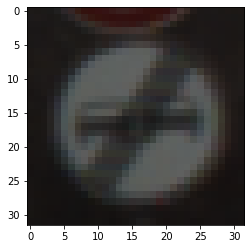

In [26]:
plt.imshow(X_train[24])

In [0]:
#mapping labels to name labels
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [28]:
classNames[y_train[24]]

'End of no passing'

Đảo trật tự ảnh và nhãn của chúng

In [0]:
from sklearn.utils import shuffle

In [0]:
X_train, y_train = shuffle(X_train, y_train)

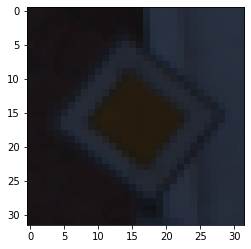

In [31]:
plt.imshow(X_train[24])

Prepare data for valid and test

In [0]:
#data for validation
X_val = valid['features']
y_val = valid['labels']
#data for test
X_test = test['features']
y_tets = test['labels']

Normalize to range 0-1

In [0]:
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test =  X_test.astype('float32') /  255.0

In [0]:
X_train[0]

array([[[0.2784314 , 0.26666668, 0.20784314],
        [0.25882354, 0.25490198, 0.21176471],
        [0.23921569, 0.23137255, 0.20392157],
        ...,
        [0.25882354, 0.24705882, 0.22352941],
        [0.21960784, 0.22352941, 0.21176471],
        [0.2627451 , 0.2784314 , 0.27058825]],

       [[0.2627451 , 0.2509804 , 0.21176471],
        [0.27058825, 0.25490198, 0.21568628],
        [0.27450982, 0.25490198, 0.20784314],
        ...,
        [0.25882354, 0.25490198, 0.22745098],
        [0.24705882, 0.24705882, 0.22745098],
        [0.27450982, 0.2901961 , 0.2784314 ]],

       [[0.24313726, 0.23529412, 0.20784314],
        [0.26666668, 0.2509804 , 0.21568628],
        [0.28235295, 0.27450982, 0.22352941],
        ...,
        [0.22745098, 0.21960784, 0.20392157],
        [0.20392157, 0.20784314, 0.19607843],
        [0.25490198, 0.26666668, 0.25490198]],

       ...,

       [[0.3529412 , 0.30588236, 0.27450982],
        [0.32156864, 0.2784314 , 0.24705882],
        [0.3254902 , 0

In [0]:
#one hot encode
from keras.utils import np_utils
y_train =  np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test =  np_utils.to_categorical(y_tets)

In [0]:
#import library
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

In [36]:
input = (32, 32, 3)
output = y_train[24].shape[0]
print(output)

43


Define model

In [67]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(output, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)              

Compile model

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

Fit model

In [69]:
N = model.fit_generator(aug.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val), steps_per_epoch=X_train.shape[0]//32, epochs=24, verbose=1)

Epoch 1/24
1087/1087 [==============================] - 26s 24ms/step - loss: 2.1352 - accuracy: 0.3678 - val_loss: 1.4231 - val_accuracy: 0.5510
Epoch 2/24
1087/1087 [==============================] - 26s 24ms/step - loss: 0.9944 - accuracy: 0.6752 - val_loss: 0.9229 - val_accuracy: 0.7098
Epoch 3/24
1087/1087 [==============================] - 26s 24ms/step - loss: 0.6019 - accuracy: 0.8002 - val_loss: 0.7492 - val_accuracy: 0.7807
Epoch 4/24
1087/1087 [==============================] - 26s 24ms/step - loss: 0.4301 - accuracy: 0.8574 - val_loss: 0.7521 - val_accuracy: 0.7941
Epoch 5/24
1087/1087 [==============================] - 26s 24ms/step - loss: 0.3409 - accuracy: 0.8870 - val_loss: 0.5290 - val_accuracy: 0.8533
Epoch 6/24
1087/1087 [==============================] - 27s 25ms/step - loss: 0.2820 - accuracy: 0.9082 - val_loss: 0.5874 - val_accuracy: 0.8522
Epoch 7/24
1087/1087 [==============================] - 26s 24ms/step - loss: 0.2430 - accuracy: 0.9188 - val_loss: 0.6035 -

In [0]:
model.save('hDn24.h5')

In [0]:
import numpy as np
from numpy import argmax

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


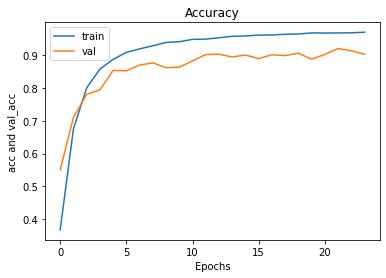

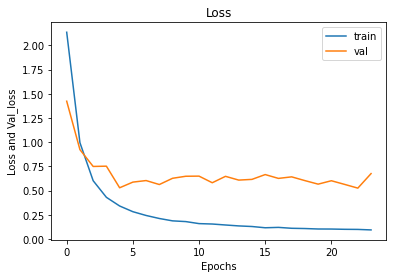

Accuracy: 0.903
Traffic Sign: Vehicles over 3.5 metric tons prohibited


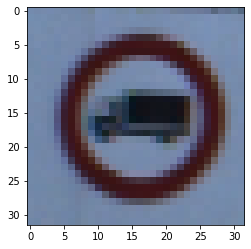

In [70]:
print(N.history.keys())
fig = plt.figure()
#plot accuracy and val_accuracy
plt.plot(N.history['accuracy'])
plt.plot(N.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('acc and val_acc')
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure()
#plot loss and val_loss
plt.plot(N.history['loss'])
plt.plot(N.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss and Val_loss')
plt.title('Loss')
plt.legend(['train', 'val'])
plt.show()
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy: %.3f' % acc)
image  = X_test[0]
plt.imshow(image)
predict = model.predict([[image]])
print('Traffic Sign: %s' % classNames[argmax(predict)])